# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Marc Ludevid Wulf, 405401
    
    2. Til Mohr, 405959
    
    3. Simon Michau, 406133

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from p_decision_tree.DecisionTree import DecisionTree
import pydotplus
import networkx
import numpy as np
import sklearn

# random_state for everything
rs = 100

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set (18 points)

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes. **(0.5 point)**

In [2]:
airbnb = pd.read_csv("AirBnB_original.csv")

airbnb.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning (4 points)

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove? **(0.5 points)**

In [3]:
prev = airbnb.shape[0]
airbnb = airbnb.dropna()
print(f"Number of rows removed: {prev - airbnb.shape[0]}")

Number of rows removed: 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed? **(0.5 point)**

In [4]:
prev = airbnb.shape[0]
airbnb = airbnb.drop_duplicates(subset="id")
print(f"Number of rows removed: {prev - airbnb.shape[0]}")

Number of rows removed: 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation. **(1 point)**

In [5]:
airbnb_cleaned = pd.read_csv("AirBnB_cleaned.csv")

avg_price = airbnb_cleaned["price"].mean()
print("Average price: ", avg_price)

q1 = airbnb_cleaned["price"].quantile(0.25)
q3 = airbnb_cleaned["price"].quantile(0.75)
print("First quartile: ", q1)
print("Third quartile: ", q3)

std = airbnb_cleaned["price"].std()
print("Standard deviation: ", std)

Average price:  625.4636797380085
First quartile:  340.0
Third quartile:  913.0
Standard deviation:  331.23624102553555


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset. **(2 points)**

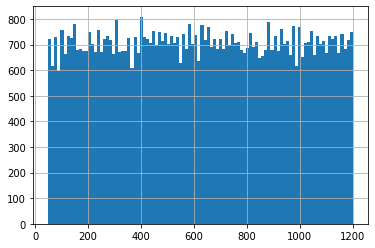

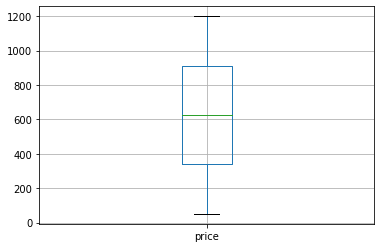

In [6]:
airbnb_cleaned["price"].hist(bins=100)
plt.show()

airbnb_cleaned.boxplot(column=["price"])
plt.show()

### Exploring Price Relationships (3 points)

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment


_Answer:_ 
 - `id`: This is a unique identifier for an apartment and will not impact the pricing decision. Therefore, we can ignore this feature in our analysis.
 - `host id`: Similarly to the `id`, this is a unique identifier for a host and will not impact the pricing decision. Therefore, we can ignore this feature in our analysis. It should be noted that some hosts might have pricier apartments than others, but in our use case we are interested in finding a suitable price for the quality / properties of the apartment, not the host.
 - `country` & `country code`: Since all apartments are located in the same country, this feature will not impact the pricing decision. Therefore, we can ignore this feature in our analysis.
 - `neighborhood group`: The region an apartment is located in does influence its price. We should use this feature.
 - `neighborhood`: Same as neighborhood group. Neighborhood being more fine-grained should make it more useful.
 - `lat`: Same as neighborhood. The more precise the location the better predictions we can make. If one side of a neighborhood borders Central Park, for example, any apartment closer to it will be even more valuable.
 - `long`: See `lat`.
 - `instant bookable`: This feature is a boolean value if an apartment is instantly bookable. In our data, we can see that no apartment is instantly bookable. Therefore, we cannot make any conclusions about the impact of this feature on the pricing decision. However, if we had apartments that are instantly bookable, we could investigate if this feature has an impact on the pricing decision. But using this data set, we can ignore this feature in our analysis.
 - `cancellation policy`: This feature is a policy for cancellation of booking. In the above visualization, we can see that there are three types of cancellation policies, that all appear equally often in the data, and don't seem to have any impact on the pricing decision. However, there might still be a correlation between the cancellation policy and the price. Therefore, we can investigate this feature in our analysis.
 - `room type`: This feature is the type of apartment/room, and there are four different types in the data set, that appear at varying frequencies. We can see that the most common type is `Entire home/apt`, followed by `Private room`, `Shared room`, and `Hotel room`. We can also see that the prices of the different types of rooms vary a bit. Therefore, we should use this feature in our analysis.
 - `construction year`: This feature is the year of construction of the apartment. It might have some underlying influence on the price. Therefore, we can use this feature in our analysis.
 - `price`: This is the feature we want to predict.
 - `service fee`: This feature is a fee of service. In the above visualization, we can see that `price` and `service fee` are highly correlated. Therefore, we should use this feature in our analysis, only if our service fee is already set. Otherwise, we can ignore this feature in our analysis.
 - `minimum nights`: This feature is the number of minimum nights to rent an apartment. We can see that this feature has some interesting relations with the properties `calculated host listings count`, `number of reviews`, and `neighborhood`. Therefore, it'll be interesting to use this feature in our analysis.
 - `number of reviews`: This feature is the number of reviews for an apartment. Since we don't have any reviews yet, this feature is not important for our pricing decision. Therefore, we can ignore this feature in our analysis.
 - `review rate number`: This feature is the review rate for an apartment (1 to 5). Since we don't have any reviews yet, this feature is not important for our pricing decision. Therefore, we can ignore this feature in our analysis.
 - `calculated host listings count`: This feature is the number of listings a host has. Since we don't have any other listings, this feature is not important for our pricing decision. Therefore, we can ignore this feature in our analysis.
 - `number rooms`: This feature is the number of rooms in an apartment. We should analyze how this feature impacts the pricing decision.

### Univariate Analysis (4.5 points)

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision? **(1 point)**

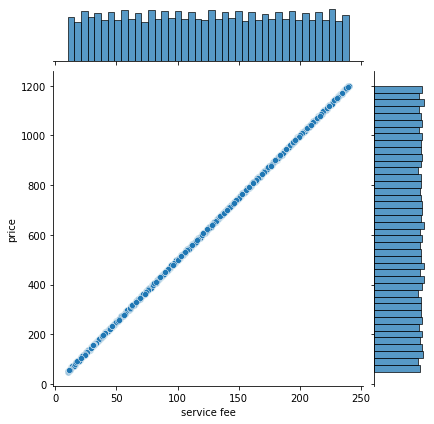

In [7]:
sns.jointplot(x="service fee", y="price", data=airbnb_cleaned)

_Answer:_

The data is strongly linearly correlated. Therefore we should most definitely use this feature.

Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation. **(1 point)**

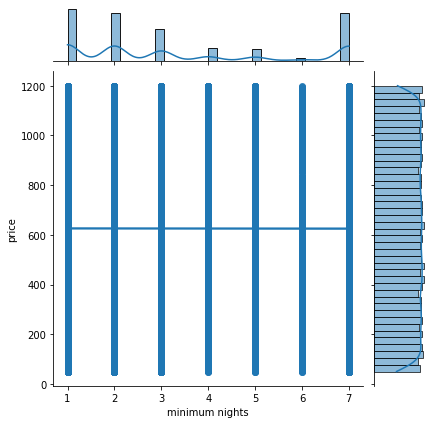

In [8]:
sns.jointplot(x="minimum nights", y="price", data=airbnb_cleaned, kind="reg")

_Answer:_

The regression shows no correlation between the minimum nights to be spend and the price of the listing. We should not use this feature.

To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price? **(2.5 point)**

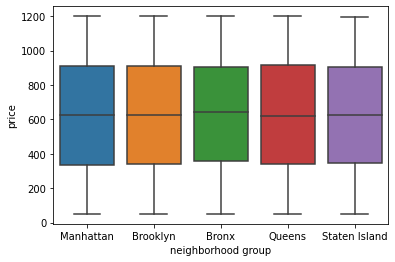

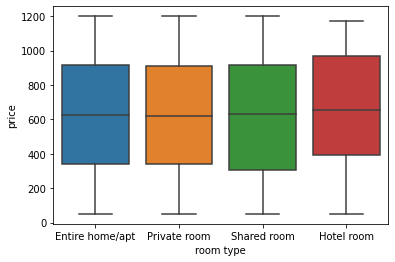

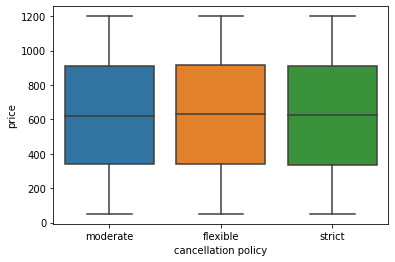

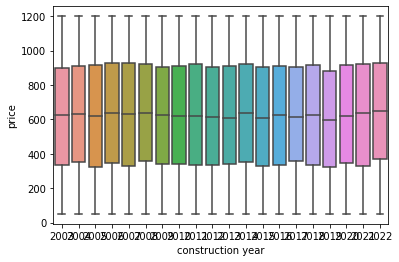

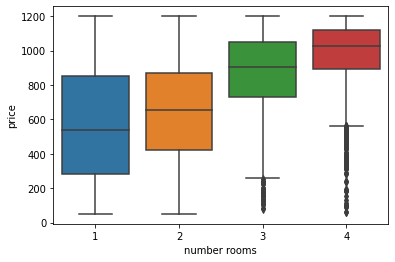

In [9]:
for x in ["neighborhood group", "room type", "cancellation policy", "construction year", "number rooms"]:
    sns.boxplot(x=x, y="price", data=airbnb_cleaned)
    plt.show()

_Answer:_
We can see, that the pricing decision does not depend on the neighborhood group. Here, the box plots for all neighborhood groups are almost equivalent. Only apartments in Bronx are a bit more pricey than apartments in the other neighborhoods. However, this difference is not significant.

The type of room does influence the price ever so slightly: Some shared-room apartments are cheaper than their private room and entire apt counterparts. However, the difference is not very significant. More importantly are hotel rooms significantly more expensive than the other room types.

For all three cancellation policies, the box plots are the same. Therefore, the cancellation policy does not influence the pricing decision.

The construction year does not seem to have a strong influence on the pricing decision. There are some minor variations in the box plots depending on the construction year, but the differences are not significant. This feature might help us fine tune the pricing decision, but it is not a strong estimator, especially since the price ranges are so great.

The number of rooms impacts the pricing decision a lot. We observe, that the maximum price is equal for apartments with a different number of rooms. However, with an increase in number of rooms we can see a great increase in mean, first quartile, and third quartile, and a decrease in the difference between third and first quartile (narrowing of price range). This means, that the price of apartments with more rooms is higher than the price of apartments with fewer rooms. This is a strong indicator for the pricing decision.

### Multivariate Analysis (5 points)

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision. 

#### Multivariate Analysis for Neighborhood Group 

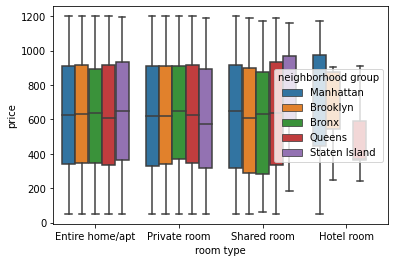

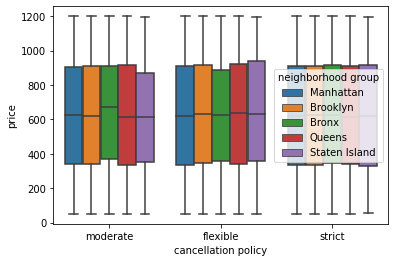

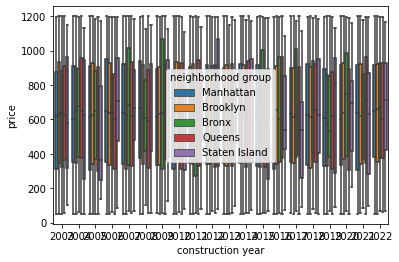

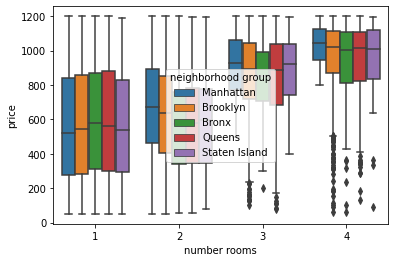

In [10]:
hue="neighborhood group"
for x in ["neighborhood group", "room type", "cancellation policy", "construction year", "number rooms"]:
    if x != hue:
        sns.boxplot(x=x, y="price", hue=hue, data=airbnb_cleaned)
        plt.show()

_Answer:_
There are a few things that stand out here:

First, it is interesting to see that there are no Airbnb Hotel Rooms in neither Bronx nor Staten Island. Furthermore, the price ranges (and whole box plots) for the other neighborhood groups greatly differ here.

Again, the cancelation policy and construction year don't affect price significantly.

It is also important to observe that prices for apartments in Staten Island, and especially Manhattan, drastically increase with the number of rooms.

#### Multivariate Analysis for Room Type

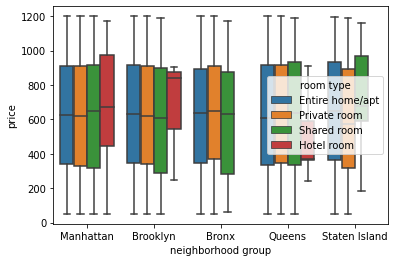

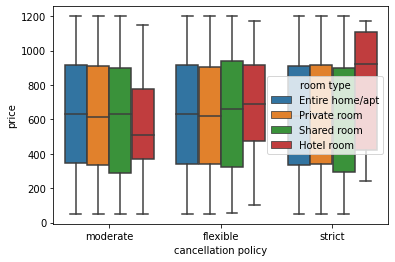

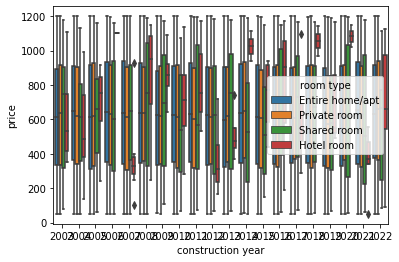

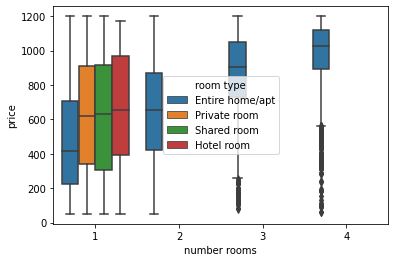

In [11]:
hue="room type"
for x in ["neighborhood group", "room type", "cancellation policy", "construction year", "number rooms"]:
    if x != hue:
        sns.boxplot(x=x, y="price", hue=hue, data=airbnb_cleaned)
        plt.show()

_Answer:_
We can see that the price distribution for hotel rooms differs a lot depending on the neighborhood group, while it is fairly stable and comparable for the other room types.

Here, the cancellation policy also influences the pricing of hotel rooms, where a stricter cancellation policy leads to a higher price.

The construction year also seems to influence the pricing of hotel rooms, but we cannot make out any trend based on the box plots.

Finally, for apartments with more than 1 room, there are only entire apartments, and no other room type. For this room type, the pricing increases with the number of rooms. Generally, hotels rooms are more pricey than private and shared rooms, which are also more pricey than entire apartments with one room.

#### Multivariate Analysis for Number of Rooms

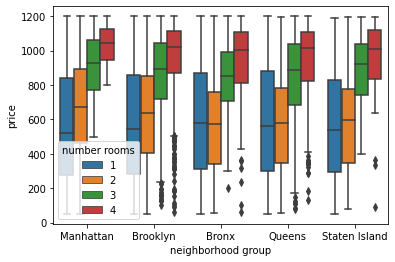

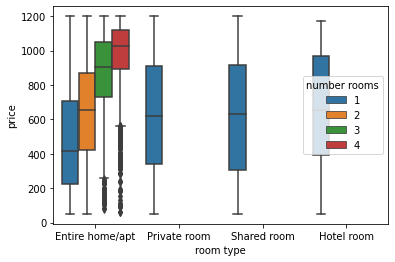

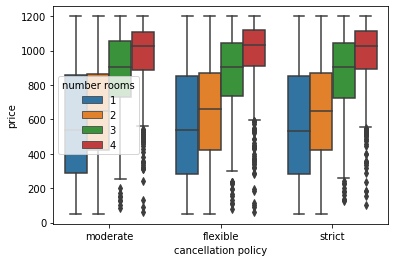

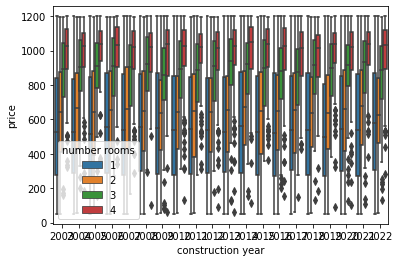

In [12]:
hue="number rooms"
for x in ["neighborhood group", "room type", "cancellation policy", "construction year", "number rooms"]:
    if x != hue:
        sns.boxplot(x=x, y="price", hue=hue, data=airbnb_cleaned)
        plt.show()

_Answer:_
In all neighborhood groups it shouldn't be too difficult to find an apartment with two rooms cheaper than an apartment with one room. If you want more than two rooms however, the price for such an apartment increases across all neighborhood groups.

Here again the cancellation policy and construction year don't seem to have a strong influence on the pricing decision. The analysis of room type and number of rooms was already done in the previous section.

#### Multivariate Analysis for Construction Year

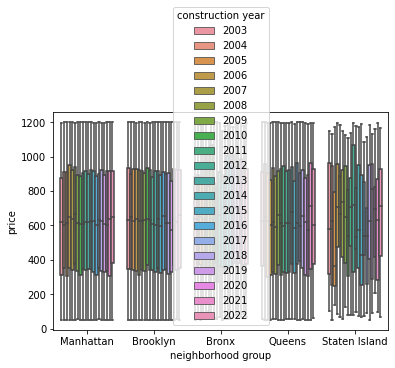

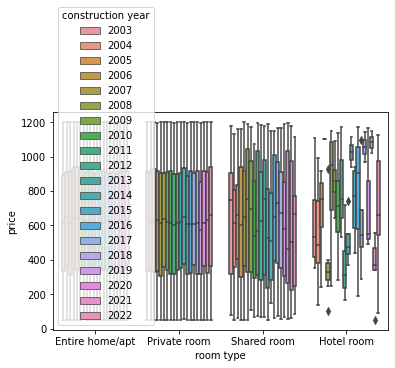

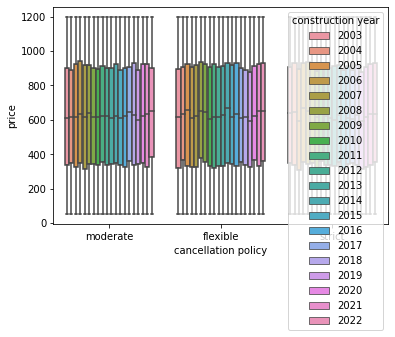

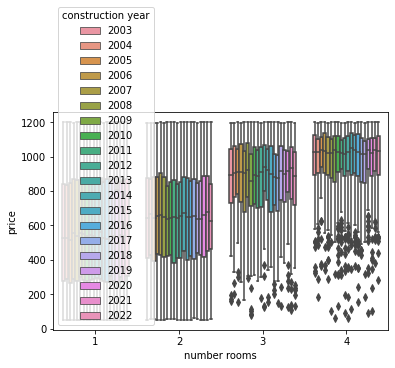

In [13]:
hue="construction year"
for x in ["neighborhood group", "room type", "cancellation policy", "construction year", "number rooms"]:
    if x != hue:
        sns.boxplot(x=x, y="price", hue=hue, data=airbnb_cleaned)
        plt.show()

_Answer:_

For hotel rooms, the construction year seems to influence the pricing decision, although no trend can be observed.

For all other categories, there is insignificant variation in the price depending on the construction year. Furthermore, is the price range (third to first quartile) very wide.

### Selection of Variables (1 point)

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
The construction year has a very wide price range, and is very consistent over the years and other attributes. Therefore, it is not a good estimator for the pricing decision.

Instead of the neighborhood group, we would use the neighborhood feature, as it gives more precise information about the location of the apartment.

In addition, we would also consider using the number of rooms, type of room, and cancellation policy for pricing our Airbnb.

## Question 2: Setting the Price (45 points)

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline (5 points)

First, you want to set a baseline to compare against. You use the mean absolute error as metric. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [14]:
from sklearn.model_selection import train_test_split
x = airbnb_cleaned[["number rooms", "neighborhood group", "room type"]]
y = airbnb_cleaned[["price"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=rs)

def baseline_prediction(x):
    return y_train["price"].mean()

from sklearn.metrics import mean_absolute_error
y_pred = X_test.apply(baseline_prediction, axis=1)
mean_absolute_error(y_test, y_pred)

284.5633400808907

## Decision Tree (15 points)

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. **(2 points)**

In [15]:
airbnb_cleaned["Price_Bins"] = pd.cut(
    airbnb_cleaned["price"],
    bins=[50,200,400,600,800,1000,1200],
    labels=["50-200", "200-400", "400-600", "600-800", "800-1000", "1000-1200"],
    include_lowest=True
)
airbnb_cleaned.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms,Price_Bins
0,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007,142,28,7,45,4,2,2,50-200
1,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005,620,124,3,0,5,1,1,600-800
2,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005,368,74,7,270,4,1,2,200-400
3,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009,204,41,7,9,3,1,1,200-400
4,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015,71,14,7,49,5,1,1,50-200


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before. **(0.5 point)**

In [16]:
descriptive_features = ["number rooms", "neighborhood group", "room type"]
x = airbnb_cleaned[descriptive_features]
y = airbnb_cleaned[["price", "Price_Bins"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=rs)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy? **(5 points)**

Note: For this task, you must use the p_decision_tree library.

System entropy:  2.577072828540696
System gini:  None


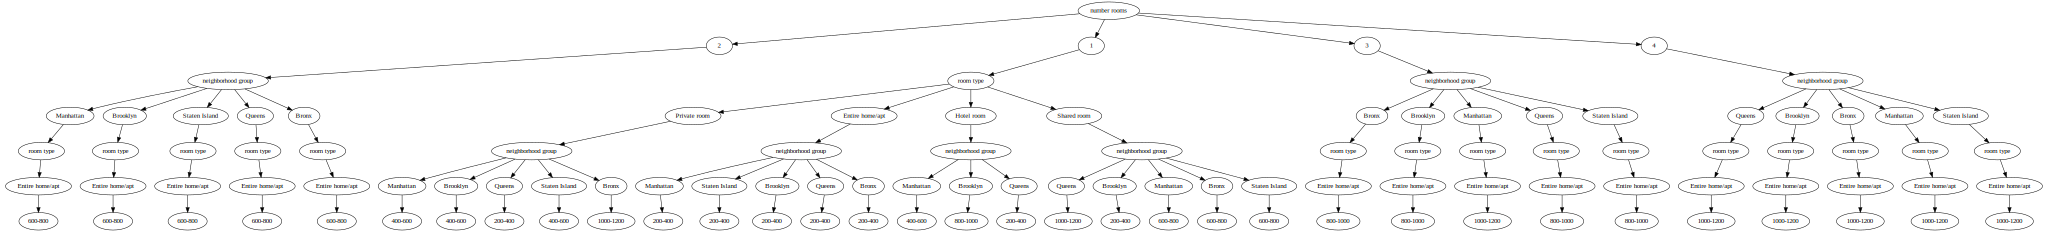

In [17]:
decisionTree = DecisionTree(
    X_train.astype(str).values.tolist(),
    descriptive_features,
    y_train["Price_Bins"].astype(str).values.tolist(),
    "entropy"
) 
decisionTree.id3(0, 10)

print("System entropy: ", decisionTree.entropy)
print("System gini: ", format(decisionTree.gini))

dot = decisionTree.print_visualTree( render=True )
display(dot)

What is the first feature the decision tree splits on? **(0.5 point)**

_Answer:_ `number rooms`



Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

**(1 point)**

_Answer:_
 - Manhattan, 1-room, Private room: 500
 - Staten Island, 1-room, Shared room: 700

What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage. **(1 point)**

In [18]:
decisionTree_prediction = 700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [19]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<2*len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above. **(2 points)**

In [20]:
y_pred = X_test.apply(get_predicted_bin, axis=1, args=(features, predictor))
y_pred = pd.DataFrame(y_pred, columns=["predicted_bin"])
y_pred.head()

,predicted_bin
27612,400-600
18650,1000-1200
32416,200-400
28153,600-800
2900,200-400


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error? **(3 points)**

In [21]:
y_pred["predicted"] = y_pred["predicted_bin"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1])) / 2)
y_pred.head()

y_pred["correct"] = airbnb_cleaned.iloc[y_pred.index]["price"]

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred["correct"], y_pred["predicted"])

279.49139147615017

## Clustering (23 points)

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding (2 points)

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

data = airbnb_cleaned[["number rooms", "neighborhood group", "room type", "price"]]

transformer = make_column_transformer(
    (OneHotEncoder(), ["neighborhood group", "room type"]),
    remainder='passthrough'
)

x = data[["number rooms", "neighborhood group", "room type"]]
y = data[["price"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=rs)

transformer.fit(X_train)
X_train_data = transformer.transform(X_train)
X_train_data = pd.DataFrame(X_train_data, columns=transformer.get_feature_names_out())

X_test_data = transformer.transform(X_test)
X_test_data = pd.DataFrame(X_test_data, columns=transformer.get_feature_names_out())

### Choosing number of clusters (8 points)

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

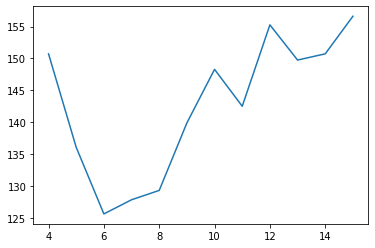

In [23]:
from sklearn.cluster import KMeans

std_deviations = []

for cluster_num in range(4,15+1):
    kmeans = KMeans(n_clusters=cluster_num, random_state=rs, n_init=100).fit(X_train_data)
    cluster_mean_price = [y_train[kmeans.labels_==i]["price"].mean() for i in range(cluster_num)]
    std_deviations.append(np.std(cluster_mean_price))

sns.lineplot(x=range(4,15+1), y=std_deviations)
plt.show()

_Answer:_ Data points between clusters should be as dissimilar as possible, while data points within clusters should be as similar as possible. Therefore, for a good clustering, the standard deviation of the centroids should be large. However, with increasing number of clusters and thus increasing standard deviation, we run into the risk of overfitting. For, we should choose a number of clusters for which the standard deviation is large, but any further increase in the number of clusters does not lead to a significant increase in the standard deviation. We chose 12 clusters.

**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment (3 points)

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [24]:
kmeans = KMeans(n_clusters=9, random_state=rs, n_init=100).fit(X_train_data)

clusters_price_means = [y_train[kmeans.labels_==k]["price"].mean() for k in range(9)]

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2],
        "neighborhood group": ["Manhattan"],
        "room type": ["Entire home/apt"]
    }
)
transformed = transformer.transform(our_apartment)
our_apartment_one_hot = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)
cluster = kmeans.predict(our_apartment_one_hot)
clustering_prediction = clusters_price_means[cluster[0]]

print(f"Mean value of the cluster predicted: {clustering_prediction}")

Mean value of the cluster predicted: 712.9656797583082


### Evaluating clustering (10 points)

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [25]:
import umap.umap_ as umap
import sklearn.preprocessing

#Preprocessing numerical
full_data = X_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result. **(5 points)**

<AxesSubplot: >

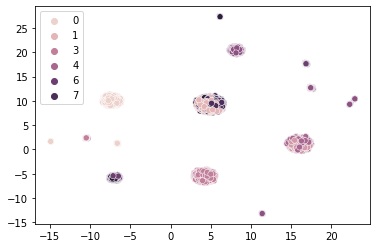

In [26]:
sns.scatterplot(x=dimension1, y=dimension2, hue=kmeans.labels_)

_Answer:_

The clustering technique seems to work moderately well. In the above graphic we can see that many clusters are homogenous in their price range. However, there are large clusters that are very heterogeneous and skew the prediction.

We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices. **(5 points)**

In [27]:
y_pred_clusters = kmeans.predict(X_test_data)
y_pred = []
for i in range(len(y_pred_clusters)):
    y_pred.append(y_train[kmeans.labels_==y_pred_clusters[i]].mean())
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Mean absolute error:  261.3025612676782


## Final comments on the price prediction (2 points)

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_
The decision tree provides a predictor that results in a mean absolute error of 279, compared to the mean absolute error of the clustering predictor of 261. While both are still better than the baseline's mean absolute error 286, their values are yet still very high. Therefore, we conclude that none of the approaches provides a good way of determining the price, as the error, and thus the resulting deviation from the optimal price, is too high. This could lead to suboptimal profits for us as a host, or also suboptimal demand.

## Question 3: Investigating Price Elasticity (32 Points)

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice. **(2 points)**

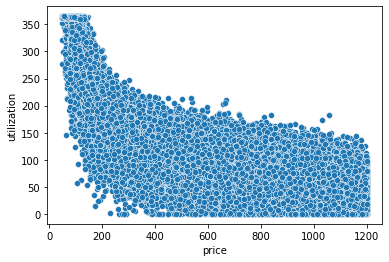

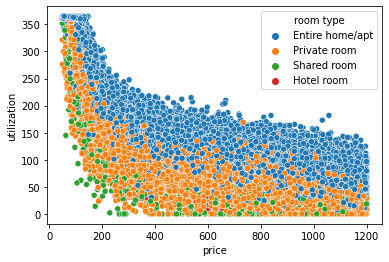

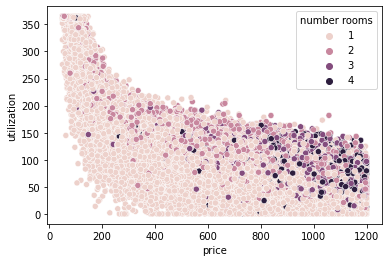

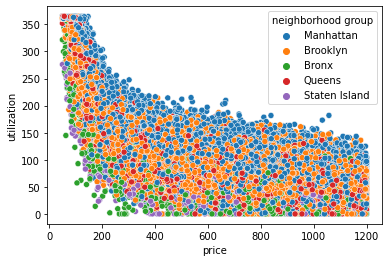

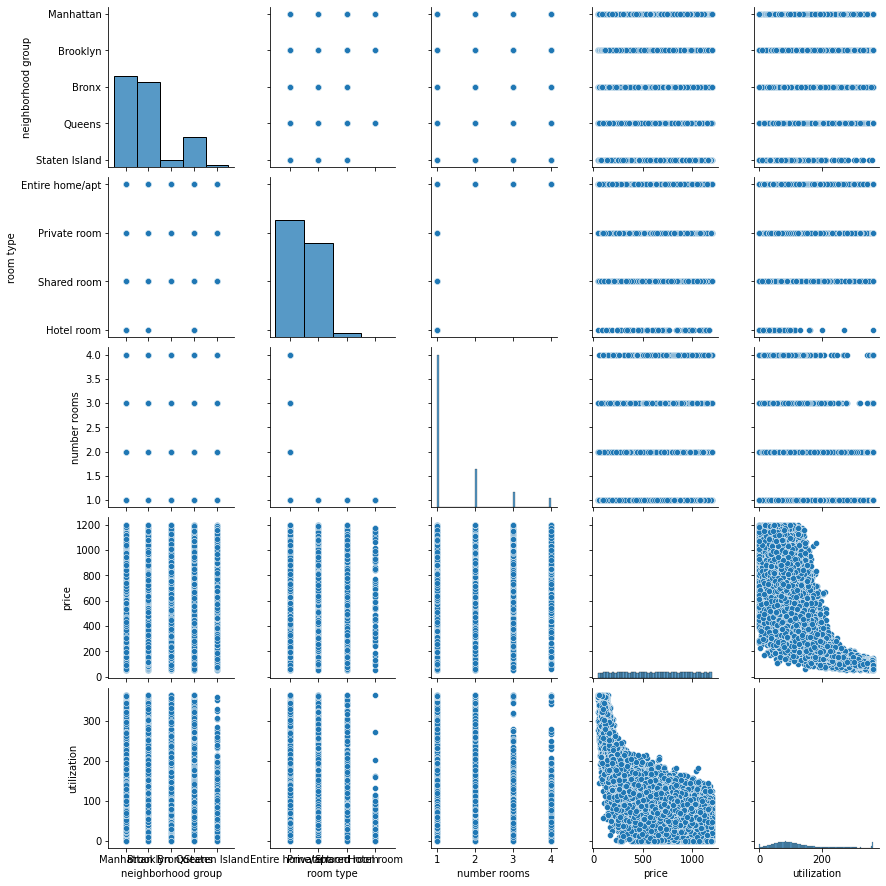

In [28]:
airbnb_utilization = pd.read_csv("AirBnB_utilization.csv")

sns.scatterplot(x="price", y="utilization", data=airbnb_utilization)
plt.show()

sns.scatterplot(x="price", y="utilization", hue="room type", data=airbnb_utilization)
plt.show()

sns.scatterplot(x="price", y="utilization", hue="number rooms", data=airbnb_utilization)
plt.show()

sns.scatterplot(x="price", y="utilization", hue="neighborhood group", data=airbnb_utilization)
plt.show()

sns.pairplot(airbnb_utilization, vars=["neighborhood group", "room type", "number rooms", "price", "utilization"])
plt.show()

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity (25 points)
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

#### Prepare the data set by splitting, one-hot encoding, and normalizing. (5 points)

In [29]:
from sklearn.preprocessing import StandardScaler

x = airbnb_utilization[["neighborhood group", "room type", "number rooms", "price"]]
y = airbnb_utilization[["utilization"]]

transformer_x = make_column_transformer(
    (OneHotEncoder(), ["neighborhood group", "room type"]),
    (StandardScaler(), ["number rooms", "price"]),
    remainder='passthrough'
)

transformer_x.fit(x)

transformed = transformer_x.transform(x)
x_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)

transformer_y = StandardScaler()

transformer_y.fit(y)

transformed = transformer_y.transform(y)
y_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_y.get_feature_names_out()
)

X_train, X_test, y_train, y_test = train_test_split(x_prepared, y_prepared, test_size=0.05, random_state=rs)

For each technique, use 5-cross-fold validation for hyperparameter optimization and assess the performance on the test set. 

#### Regression (5 points)

Learn a linear regression to predict the utilization of an AirBnB.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
lr = GridSearchCV(LinearRegression(), params, n_jobs=-2, cv=5, verbose=-1)
lr.fit(X_train, y_train)
print(lr.best_params_)
print(lr.best_score_)
lr_best_model = lr.best_estimator_

{'fit_intercept': True, 'positive': False}
0.659431825778366


What is the mean absolute error achieved on the test data?

In [31]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test, lr.predict(X_test)))

Mean absolute error:  0.43869729891978365


Show (draw!) the price elasticity for your apartment. 

<AxesSubplot: >

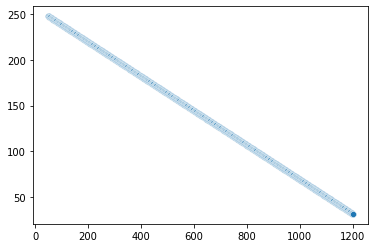

In [32]:
prices = list(range(50,1200+1))

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = lr.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform(y_pred)

sns.scatterplot(x=prices, y=y_pred_destd.flatten())

#### Linear SVR (5 points)

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
params = {
    'epsilon': [0, 0.0001, 0.001],
    'tol': [0.001, 0.01, 0.1],
    'C': [0.1, 1, 10],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'fit_intercept': [True, False],
}
svr = GridSearchCV(LinearSVR(random_state=rs), params, n_jobs=-2, cv=5, verbose=-1)
svr.fit(X_train, y_train)
print(svr.best_params_)
print(svr.best_score_)
lsvr_best_model = svr.best_estimator_

/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

{'C': 0.1, 'epsilon': 0.001, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'tol': 0.01}
0.6594302702791213


/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


What is the mean absolute error achieved on the test data?

In [34]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test, svr.predict(X_test)))

Mean absolute error:  0.43825607411764844


Show (draw!) the price elasticity for your apartment. 

<AxesSubplot: >

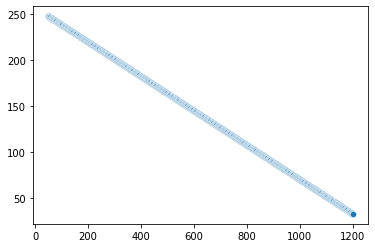

In [35]:
prices = list(range(50,1200+1))

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = svr.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform([y_pred])

sns.scatterplot(x=prices, y=y_pred_destd.flatten())

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression (2.5 points)

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
polynomial_price = make_column_transformer(
    (PolynomialFeatures(), ["standardscaler__price"]),
    remainder='passthrough')
params = {
    'columntransformer__polynomialfeatures__degree': [1,2,3,4,5],
    'columntransformer__polynomialfeatures__include_bias': [True, False],
    'columntransformer__polynomialfeatures__interaction_only': [True, False],
    'linearregression__fit_intercept': [True, False],
    'linearregression__positive': [True, False]
}
lr_kernel = GridSearchCV(make_pipeline(polynomial_price, LinearRegression()), params, n_jobs=6, cv=5, verbose=-1)
lr_kernel.fit(X_train, y_train)
print(lr_kernel.best_params_)
print(lr_kernel.best_score_)
lr_poly_best_model = lr_kernel.best_estimator_

{'columntransformer__polynomialfeatures__degree': 5, 'columntransformer__polynomialfeatures__include_bias': True, 'columntransformer__polynomialfeatures__interaction_only': False, 'linearregression__fit_intercept': False, 'linearregression__positive': False}
0.9030920296152025


What is the mean absolute error achieved on the test data?

In [37]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test, lr_kernel.predict(X_test)))

Mean absolute error:  0.25143942019708015


Show (draw!) the price elasticity for your apartment. 

<AxesSubplot: >

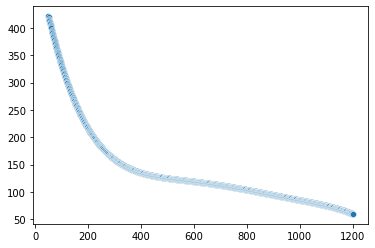

In [38]:
prices = list(range(50,1200+1))

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = lr_kernel.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform(y_pred)

sns.scatterplot(x=prices, y=y_pred_destd.flatten())

#### Kernels in SVR (2.5 points)

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
params = [
{
    'epsilon': [0.001, 0.01, 0.1],
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5]
},
{
    'epsilon': [0.001, 0.01, 0.1],
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'sigmoid'],
},
]
svr_kernel = GridSearchCV(SVR(), params, n_jobs=-2, cv=5, verbose=-1)
svr_kernel.fit(X_train.head(25000), y_train["utilization"].head(25000))
print(svr_kernel.best_params_)
print(svr_kernel.best_score_)
svr_best_model = svr_kernel.best_estimator_

{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
0.9089331769867026


What is the mean absolute error achieved on the test data?

In [40]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test, svr_kernel.predict(X_test)))

Mean absolute error:  0.24410595464640153


Show (draw!) the price elasticity for your apartment. 

<AxesSubplot: >

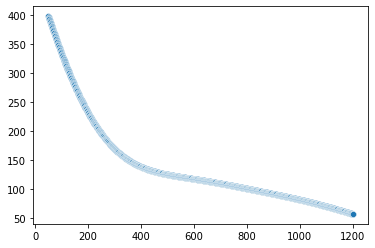

In [41]:
prices = list(range(50,1200+1))

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = svr_kernel.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform([y_pred])

sns.scatterplot(x=prices, y=y_pred_destd.flatten())

What is your conclusion on using kernels?

_Answer:_

We can see that kernels greatly improve the performance of the model. Between Linear Regression with kernels and SVR with kernels, however, there is only a minor difference in performance.


#### Neural Network (5 points)

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

params = {
    'hidden_layer_sizes': [(32,), (32,16), (16,16,16), (16,8,8,8,8)], # wide vs deep
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}
mlp = GridSearchCV(MLPRegressor(random_state=rs), params, n_jobs=-2, cv=5, verbose=-1)
mlp.fit(X_train, y_train)
print(mlp.best_params_)
print(mlp.best_score_)
mlp_best_model = mlp.best_estimator_

/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/neural_netwo

{'activation': 'tanh', 'hidden_layer_sizes': (16, 16, 16), 'solver': 'lbfgs'}
0.9155327336938385


/home/tilmohr/miniconda3/envs/ids/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


What is the mean absolute error achieved on the test data?

In [43]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test, mlp.predict(X_test)))

Mean absolute error:  0.23504147400453582


Show (draw!) the price elasticity for your apartment. 

<AxesSubplot: >

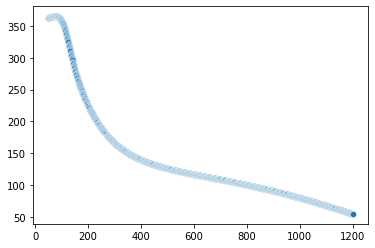

In [44]:
prices = list(range(50,1200+1))

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = mlp.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform([y_pred])

sns.scatterplot(x=prices, y=y_pred_destd.flatten())

### Profit discrepencies when incorporating price elasticity (5 points)

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

Anual income with the price suggested by the decision tree 700 at an expected utilization of 108.9036997481962 will be 76232.58982373735
Anual income with the price suggested by the clustering 712.9656797583082 at an expected utilization of 107.84195766432626 will be 76887.61465261306
Clustering is better!
Optimal price according to utilization data:
900 with utilization 90.94963651879401 resulting in 81854.67286691461 anual income


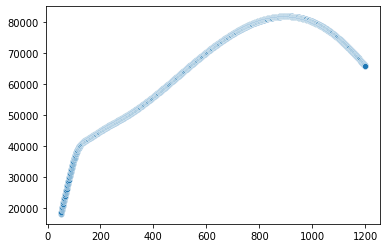

In [45]:
# Your answer goes here
# best model is the mlp

prices = [decisionTree_prediction, clustering_prediction]

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = mlp.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform([y_pred])

decisionTree_anually = decisionTree_prediction * y_pred_destd[0][0]
clustering_anually = clustering_prediction * y_pred_destd[0][1]

print(f"Anual income with the price suggested by the decision tree {decisionTree_prediction} at an expected utilization of {y_pred_destd[0][0]} will be {decisionTree_anually}")
print(f"Anual income with the price suggested by the clustering {clustering_prediction} at an expected utilization of {y_pred_destd[0][1]} will be {clustering_anually}")

if decisionTree_anually < clustering_anually:
    print("Clustering is better!")
elif clustering_anually < decisionTree_anually:
    print("DecisionTree is better!")
else:
    print("Both approaches are equally good!")

print("Optimal price according to utilization data:")

prices = list(range(50,1200+1))

our_apartment = pd.DataFrame.from_dict(
    {
        "number rooms": [2 for _ in range(len(prices))],
        "neighborhood group": ["Manhattan" for _ in range(len(prices))],
        "room type": ["Entire home/apt" for _ in range(len(prices))],
        "price": prices
    }
)
transformed = transformer_x.transform(our_apartment)
our_apartment_prepared = pd.DataFrame(
    transformed, 
    columns=transformer_x.get_feature_names_out()
)
y_pred = mlp.predict(our_apartment_prepared)
y_pred_destd = transformer_y.inverse_transform([y_pred]).flatten()

anually = np.multiply(y_pred_destd, prices)
max_index = anually.argmax()

print(f"{prices[max_index]} with utilization {y_pred_destd[max_index]} resulting in {anually[max_index]} anual income")

sns.scatterplot(x=prices, y=anually.flatten())
plt.show()

_Answer:_
The price predicted by clustering is better.

The optimal price according to utilization data is 900.


# Question 4: Conclusion (5 points)

Summarize your findings and discuss limitations.

_Answer:_ 

We have seen over this assignment that the more powerful the model we used, the better the results. But, on the other hand, even the most simple model produced acceptable results.

However, we have only used a small subset of the features in the data-set. Using more features would likely improve the results even more.

Another limitation of the model is that it is too simple to account for other factors that affect the price of an apartment, such as the season, the events in the city, etc. An even more complex model with more complete data would be able to account for such factors.
